In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Physical Constants
G = 6.67430e-11
M = 1.989e30
c = 299792458
AU = 1.496e11
r_s = 2 * G * M / c**2

In [3]:
# Orbit Parameters (modifiable)
L = 1.8e12               # Angular momentum per unit mass
r0 = 50 * r_s            # Initial distance
u0 = 1 / r0
v0 = 0                   # Initial radial derivative
y0 = np.array([u0, v0])  # Initial state vector

In [4]:
# Simulation parameters
h = 0.001                # Step size
n_orbits = 10            # Number of orbits
phis = np.arange(0, 2 * np.pi * n_orbits, h)

In [5]:
# ODE system: dy/dx = f(x, y)
def schwarzschild_ode(phi, y):
    u, v = y
    du_dphi = v
    dv_dphi = G*M / L**2 + 3*G*M*u**2 / c**2 - u
    return np.array([du_dphi, dv_dphi])

# RK4 Integrator
def rk4_step(f, x, y, h):
    k1 = h * f(x, y)
    k2 = h * f(x + h/2, y + k1/2)
    k3 = h * f(x + h/2, y + k2/2)
    k4 = h * f(x + h, y + k3)
    return y + (k1 + 2*k2 + 2*k3 + k4) / 6

# Integration function
def integrate(f, xs, y0, h):
    ys = np.zeros((len(xs), 2))
    y = y0.copy()
    for i, x in enumerate(xs):
        ys[i] = y
        y = rk4_step(f, x, y, h)
    return ys

In [6]:
# Run simulation
sol = integrate(schwarzschild_ode, phis, y0, h)
u_vals = sol[:, 0]
r_vals = 1 / u_vals
r_AU = r_vals / AU

In [7]:
# event horizon

def event_horizon(r_s):
    thetas = np.linspace(0,2*np.pi,100)
    return r_s/AU*np.cos(thetas),r_s/AU*np.sin(thetas)

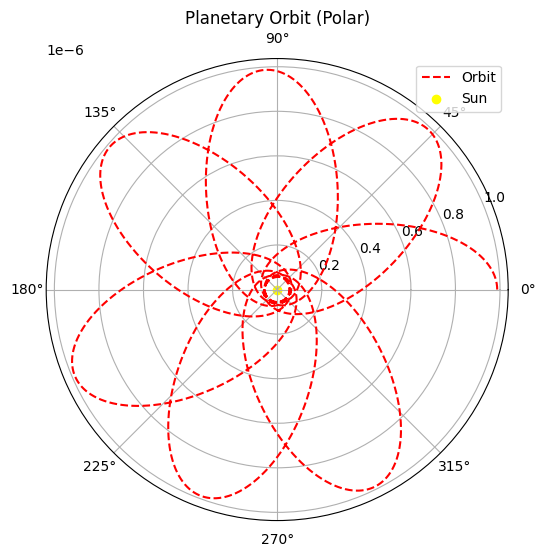

In [8]:
# Plot 1: Polar Plot
plt.figure(figsize=(6,6))
ax = plt.subplot(111, polar=True)
ax.plot(phis, r_AU, 'r--', label='Orbit')
ax.scatter([0], [0], color='yellow', label='Sun')
plt.title("Planetary Orbit (Polar)")
plt.legend()
plt.show()

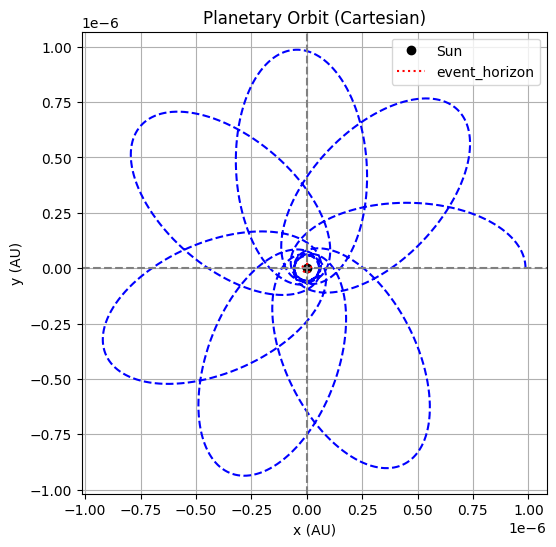

In [9]:
# Cartesian coordinates
x_vals = r_AU * np.cos(phis)
y_vals = r_AU * np.sin(phis)
event_hor_x,event_hor_y = event_horizon(r_s)

# Plot 2: Cartesian Orbit
plt.figure(figsize=(6,6))
plt.plot(x_vals, y_vals, 'b--')
plt.plot(0, 0, 'ko', label='Sun')
plt.plot(event_hor_x,event_hor_y,linestyle = 'dotted',c = 'red' ,label = 'event_horizon')
plt.axhline(0, linestyle='--', color='gray')
plt.axvline(0, linestyle='--', color='gray')
plt.xlabel("x (AU)")
plt.ylabel("y (AU)")
plt.title("Planetary Orbit (Cartesian)")
plt.axis('equal')
plt.grid(True)
plt.legend()
plt.show()

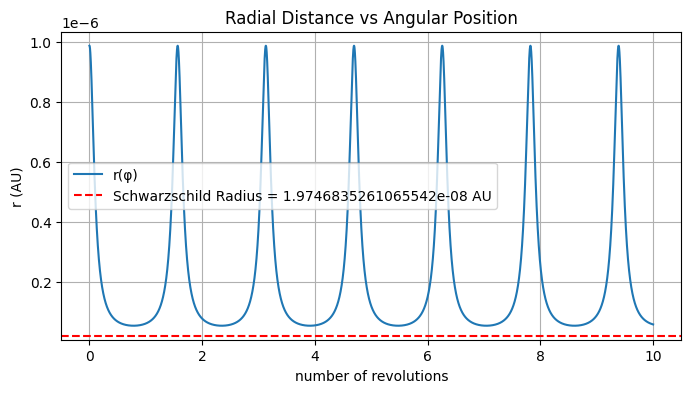

In [10]:
# Plot 3: r vs phi
plt.figure(figsize=(8,4))
plt.plot(phis/2/np.pi, r_AU, label='r(φ)')
plt.axhline(r_s / AU, color='r', linestyle='--', label=f'Schwarzschild Radius = {r_s/AU} AU')
plt.xlabel("number of revolutions")
plt.ylabel("r (AU)")
plt.title("Radial Distance vs Angular Position")
plt.legend()
plt.grid(True)
plt.show()

In [11]:
# Closest approach and Schwarzschild check
min_r = np.min(r_vals)
print(f"Distance of Closest Approach = {min_r/1e3:.2f} km")
print(f"Schwarzschild Radius = {r_s/1e3:.2e} km")

if r_s < min_r:
    print("✓ The particle did not fall into the black hole.")
else:
    print("✗ The particle fell into the black hole.")


Distance of Closest Approach = 8.27 km
Schwarzschild Radius = 2.95e+00 km
✓ The particle did not fall into the black hole.
